# Fashion_MNIST data set classification of image with machine learning

## Objective
By the end of this project, we will:
- Understand how to load and explore the Fashion-MNIST dataset.
- Preprocess images for logistic regression.
- Train and evaluate a logistic regression classifier.
- Interpret the results and identify strengths/weaknesses.

## Introduction to Fashion-MNIST dataset image Classification

The Fashion-MNIST dataset is a widely used benchmark in machine learning and computer vision. It consists of 70,000 grayscale images of fashion items, such as t-shirts, trousers, and sneakers, each sized 28×28 pixels. The goal of Fashion-MNIST classification is to develop models that can accurately recognize and classify these images into their correct clothing categories.

Because of its simplicity and well-structured format, Fashion-MNIST serves as an excellent starting point for learning image classification techniques, including logistic regression, neural networks, and deep learning models. Success on Fashion-MNIST demonstrates a model’s ability to extract meaningful features from image data and make accurate predictions on unseen samples.

In this lab, we will use the logistic regression model for classification. Logistic regression is a simple yet powerful statistical method that predicts the probability of an input belonging to a particular class. For Fashion-MNIST, it models the probability that an image corresponds to each fashion category.

The class labels in Fashion-MNIST correspond to the following products:

| Label | Product     |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


### Step 1: Import libraries
We import essential libraries for this task:
1. NumPy for numerical operations.
2. Matplotlib for data visualization.
3. scikit-learn for building and evaluating the logistic regression and svc model
4. classification_report & confusion_matrix help evaluate performance.
5. TensorFlow to load the Fashion-MNIST dataset easily and build the CNN model. We use Fashion-MNIST directly from Keras for convenience.

In [2]:
#importing necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_project import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from sklearn.svm import SVC

### Step 2: Load the MNIST dataset
In this step, we load the Fashion-MNIST dataset using TensorFlow’s built-in tf.keras.datasets.fashion_mnist.load_data() function. This provides the dataset split into training and testing sets directly as NumPy arrays. Each image is a 28×28 grayscale pixel array, and the labels are integers from 0 to 9, each representing a specific clothing category. This built-in method is convenient and efficient for quick access to the dataset.

1. Fashion-MNIST contains 28×28 grayscale images of 10 fashion categories.
2. x_train has 60,000 images, x_test has 10,000 images

In [3]:
#importing the dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train) , (x_test,y_test) = fashion_mnist.load_data()

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


### Step 3: Visualize sample images
Here we display five images from the training set. This visualization helps familiarize with the dataset and confirms that the images and labels align.

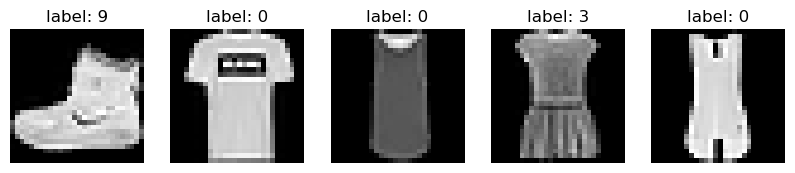

In [4]:
#visualization of 5 sample data point
plt.figure(figsize =(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train [i], cmap = 'gray')
    plt.title(f"label: {y_train[i]}")
    plt.axis('off')
plt.show()

### Visualization of the class distribution of the dataset
Our Fashion-MNIST dataset is well balanced with 7000 images of each ctaegorys.

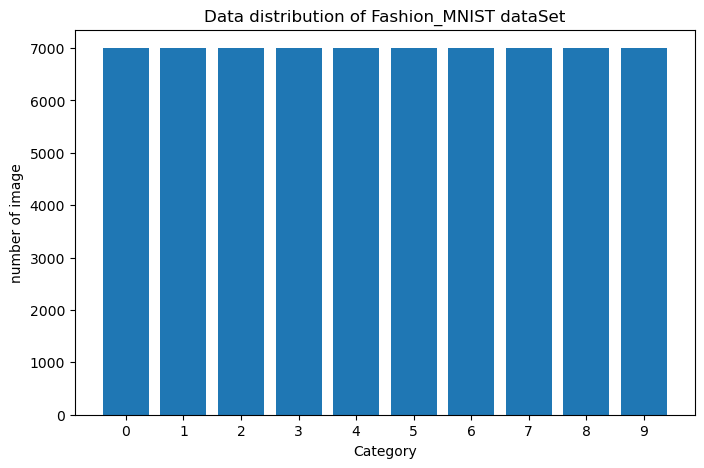

In [5]:
#visualization of data distribution
all_labels = np.concatenate( [y_train,y_test])

unique, counts = np.unique(all_labels, return_counts =True)

plt.figure(figsize =(8,5))
plt.bar(unique, counts, tick_label=unique)
plt.title("Data distribution of Fashion_MNIST dataSet")
plt.xlabel("Category")
plt.ylabel("number of image")
plt.show()

### Visualizing the pixel intensity distribution of our data

We found that, in our data set, images are black and white. Which is correctly displayed in our pixel intensity distribution. 

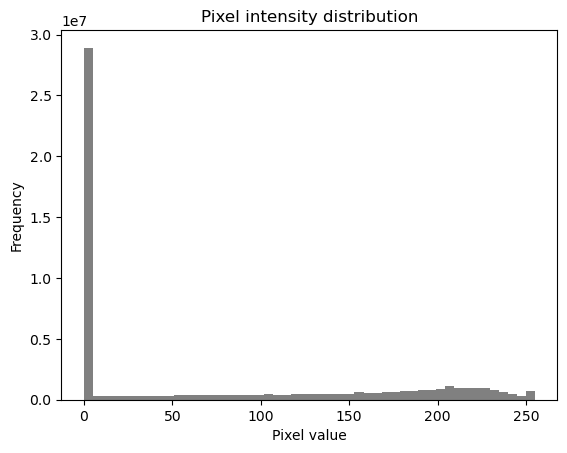

In [6]:
#pixel intensity distribution

all_images = np.concatenate([x_train, x_test], axis =0)
plt.hist(all_images.ravel(), bins = 50 , color = 'gray')
plt.title("Pixel intensity distribution")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

### Heatmap of the pixel sparsity
Heatmap shows pixel sparsity of the images

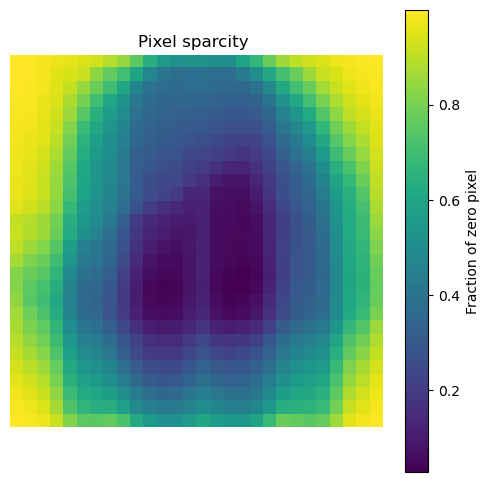

In [7]:
zero_mask = (all_images == 0)
zero_fraction = zero_mask.mean(axis = 0)

plt.figure(figsize=(6,6))
plt.imshow(zero_fraction, cmap ='viridis')
plt.colorbar(label ='Fraction of zero pixel')
plt.title("Pixel sparcity ")
plt.axis('off')
plt.show()

### Step 4: Preprocess the data
Since logistic regression expects input as feature vectors, each 28×28 image must be flattened into a one-dimensional vector of length 784 (28 × 28).

We also normalize the pixel values from the range 0–255 to 0–1. Normalization improves model performance and helps achieve faster and more stable convergence during training.

1. Flattening: Converts each 28×28 image into a 1D vector of size 784.
2. Normalization: Scales pixel values to the range [0, 1] for better model convergence and stability

In [8]:
#Data preparation for analysis
#Flating each 28*28 image into a 784-length metrics
x_train_flat = x_train.reshape (x_train.shape[0], -1)
x_test_flat = x_test.reshape (x_test.shape [0], -1)

#Normalizing the pixel value to 0-1 range
x_train_flat = x_train_flat.astype ('float32')/ 255.0
x_test_flat = x_test_flat.astype ('float32') / 255.0

### Displaying the pixel matrix of an image
Now we will select an image and display the pixel matrix of that image.

Pixel matrix for a sample image:
    0   1   2   3    4    5    6    7    8    9   ...   18   19   20   21  \
0    0   0   0   0    1    0    0    0    0   22  ...    9    0    0    0   
1    0   0   0   1    0    0   20  131  199  206  ...  206  188  126   17   
2    0   0   0   1    0   35  214  191  183  178  ...  183  189  195  185   
3    0   0   0   0    0  170  190  172  177  176  ...  175  175  177  183   
4    0   0   0   0   25  194  180  178  174  184  ...  193  190  178  175   
5    0   0   0   0   42  218  191  197  208  204  ...  214  211  211  191   
6    0   0   0   0   88  221  215  217  219  211  ...  135  212  203  207   
7    0   0   0   0    0   27  118  162   40    0  ...    0    0  203  230   
8    0   0   0   0  138  136   71   69   54  216  ...  221  186   38   26   
9    0   0   0   0   67  134  154  224  129   66  ...   86   73  157  151   
10   0   0   0   0  203  198  172  183  206  255  ...  255  238  184  160   
11   0   0   0   0  122  188  224  151  105

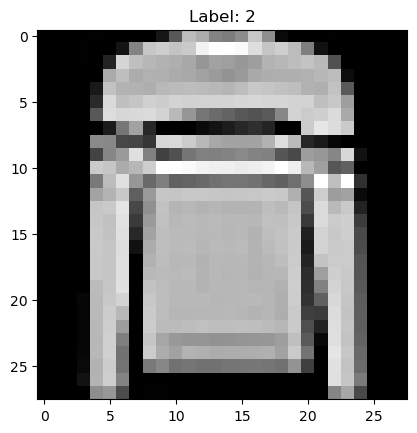

In [9]:
#Displaying the pixel matrix of a sample image
image = x_train[5]

df = pd.DataFrame(image)
print("Pixel matrix for a sample image:")
print(df)

#optimally visualizing the image

plt.imshow(image, cmap = 'gray')
plt.title ( f"Label: {y_train[5]}")
plt.show()

### Step 5: Build and Train the logistic regression model
We create a multinomial logistic regression model using the ‘saga’ solver, which is suitable for multi-class classification problems and large datasets. The model is then trained on the flattened and normalized Fashion-MNIST images along with their corresponding labels.

1. Multinomial logistic regression: Handles multiple classes (10 fashion categories in Fashion-MNIST).
2. SAGA solver: Efficient for large datasets and supports the multinomial loss function.
3. Training process: The model learns weights for each pixel to distinguish between different clothing categories.

In [10]:
# Using 'saga' solver for large datasets and multinomial classification
model_reg = LogisticRegression(
    solver = 'saga',
    max_iter = 3000,
    tol = 0.01,
    verbose = 1,
    n_jobs = 1,
    warm_start = True  
)

model_reg.fit(x_train_flat , y_train)

convergence after 37 epochs took 128 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


,penalty,'l2'
,dual,False
,tol,0.01
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,3000
,multi_class,'deprecated'


### Step 6: Evaluate the model
After training, we predict labels for the test dataset. We evaluate the model’s performance using accuracy and detailed classification metrics such as precision, recall, and F1-score.
1. Accuracy gives an overall measure of correct predictions.
2. Confusion matrix shows per-class performance.
3. Classification report gives precision, recall, and F1 score for each digit.

In [11]:
#calculating accuracy for regression model
accuracy = model_reg.score(x_test_flat, y_test)
print(f"Test accuracy: {accuracy:4f}")

y_pred = model_reg.predict(x_test_flat)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:", cm)

print("\nClassification Report:", classification_report(y_test,y_pred))

Test accuracy: 0.844700
Confusion matrix: [[806   3  13  52   5   3 108   0  10   0]
 [  4 956   4  26   5   0   3   0   2   0]
 [ 24   3 736  12 125   1  85   1  13   0]
 [ 28  14  16 869  28   0  38   0   7   0]
 [  0   1 112  38 760   0  81   0   8   0]
 [  1   0   0   1   0 926   0  48   4  20]
 [140   2 123  40 103   0 570   0  22   0]
 [  0   0   0   0   0  29   0 942   0  29]
 [  6   1   8  11   3   4  22   6 939   0]
 [  0   1   0   0   0  15   1  40   0 943]]

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8    

We found that, Logistic regression model accuracy is 84%. Now we will try SVC model to improve the accuracy of our prediction.

### Fitting SVC model.
now we will fit the SVC model and see if the accuracy improves with this model.

In [13]:
#fitting svc model
model_svc = SVC(kernel='rbf')
model_svc.fit(x_train_flat, y_train)
print("Test accuracy:", model_svc.score(x_test_flat, y_test))

Test accuracy: 0.8829


In [14]:
#calculating accuracy for svc model
y_pred_svc = model_svc.predict(x_test_flat)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:", cm)

print("\nClassification Report:", classification_report(y_test,y_pred_svc))

Confusion matrix: [[806   3  13  52   5   3 108   0  10   0]
 [  4 956   4  26   5   0   3   0   2   0]
 [ 24   3 736  12 125   1  85   1  13   0]
 [ 28  14  16 869  28   0  38   0   7   0]
 [  0   1 112  38 760   0  81   0   8   0]
 [  1   0   0   1   0 926   0  48   4  20]
 [140   2 123  40 103   0 570   0  22   0]
 [  0   0   0   0   0  29   0 942   0  29]
 [  6   1   8  11   3   4  22   6 939   0]
 [  0   1   0   0   0  15   1  40   0 943]]

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0

For SVC model we got 88%. Now we will try CNN model to improve the model accuracy more.

### Data preparation for CNN model

In [15]:
#Data preparation for cnn model
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


### Fitting the CNN model

In [16]:
# fitting cnn model

model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


D:\introduction_to_python\.pixi\envs\default\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 21ms/step - accuracy: 0.8371 - loss: 0.4488 - val_accuracy: 0.8693 - val_loss: 0.3632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8913 - loss: 0.2996 - val_accuracy: 0.8763 - val_loss: 0.3307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9062 - loss: 0.2533 - val_accuracy: 0.8952 - val_loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9184 - loss: 0.2215 - val_accuracy: 0.9017 - val_loss: 0.2656
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9261 - loss: 0.1952 - val_accuracy: 0.9040 - val_loss: 0.2660


In [17]:
#Calculating accuracy for cnn model
test_loss, test_acc = model_cnn.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9040


After 5 Epoch we have 90% accuracy using the CNN model.

In [25]:
# Predict probabilities
probabilities = model_cnn.predict(x_test)

# Convert to predicted class labels
y_pred_cnn = np.argmax(probabilities, axis=1)

# Now confusion matrix works
cm = confusion_matrix(y_test, y_pred_cnn)
print("Confusion matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion matrix:
 [[887   0  11   5   4   1  84   0   8   0]
 [  6 973   0  11   3   0   5   0   2   0]
 [ 13   0 795   4  91   0  93   0   4   0]
 [ 32   2  12 836  61   0  52   0   5   0]
 [  0   0  20   8 915   0  51   0   6   0]
 [  0   0   0   0   0 980   0  12   0   8]
 [119   0  47  11  69   0 736   0  18   0]
 [  0   0   0   0   0  10   0 961   0  29]
 [  2   0   3   0   2   1   2   2 988   0]
 [  1   0   0   0   0   5   0  25   0 969]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.90      0.80      0.84      1000
           3       0.96      0.84      0.89      1000
           4       0.80      0.92      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.96      0.96      0.96      10

### Step 7: Visualize the predictions
This step visualizes the first 10 images from the test set where the CNN model predicted the digit correctly. It helps qualitatively assess the model’s successes. Here we also display the first 10 test images where the model made incorrect predictions, highlighting areas where the model could be improved. Visualization helps you better understand and interpret your results and model performance.
1. np.where(y_pred == y_test) gets the indices where predictions match the true labels.
2. np.where(y_pred != y_test) gets the indices where they differ.


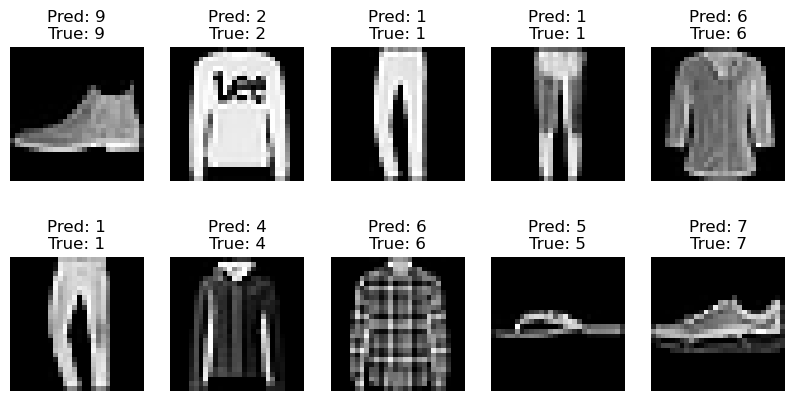

In [26]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {y_pred_cnn[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

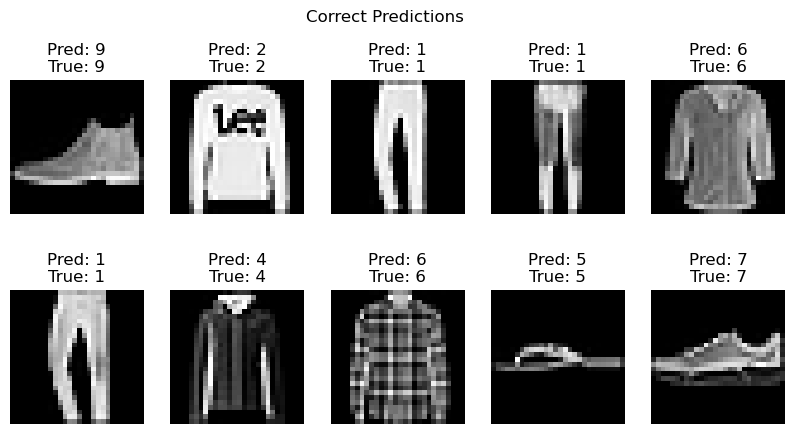

In [27]:
# Find indices of correct and incorrect predictions
correct_indices = np.where(y_pred_cnn == y_test)[0]
incorrect_indices = np.where(y_pred_cnn != y_test)[0]

# Visualize first 10 correct predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_pred_cnn[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

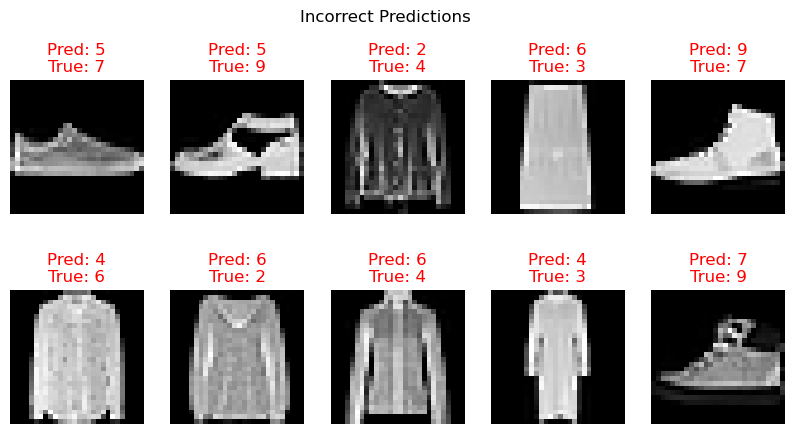

In [29]:
# Visualize first 10 incorrect predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_pred_cnn[idx]}\nTrue: {y_test[idx]}", color='red')
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()